# MSc Thesis - Hugo Stam

#### Investment Strategy Simulation - Adaptive terminal planning in the light of an uncertain future

##### Example 2 - Offshore-onshore port system development. 
The offshore and onshore facilities are connected by barge link, therefore a navigation channel has to be dredged.

<img src="../system_layout_alternative_2.2.png" style="width:1000px">

* [**0. Prepare inputs:**](#0.-Prepare-inputs)<br>
   * [**0.1 Generate demand forecast scenario:**](#0.1-Generate-demand-forecast-scenario)<br>
   * [**0.2 Generate vessels:**](#0.2-Generate-vessels)<br>
   * [**0.3 Generate site specific conditions:**](#0.3-Generate-site-specific-conditions)<br>
* [**1. Instatiate system components:**](#1.-Instatiate-system-components)<br>
* [**2. Start simulation:**](#2.-Strart-simulation)<br>
* [**3. Report all elements:**](#3.-Report-all-elements)<br>

#### notes:

- add navigation channel in front of offshore terminal (capex and opex)
- add bridge/causeway between offshore-onshore terminal (capex and opex)
- add overseas transport costs (opex)

In [1]:
import numpy as np
import pandas as pd
import statistics as st

import matplotlib.pyplot as plt
import matplotlib as mpl

from opentisim import container_objects
from opentisim import container_defaults
from opentisim import container_system

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 15

## 0.1 Generate demand forecast scenario

In [7]:
years = list(range(startyear, startyear + lifecycle))
%store -r total_ocean_transport

# demand = []

# for year in years:
#     if year < 2025:
#         demand.append(total_ocean_transport)
#     elif year < 2030:
#         demand.append(total_ocean_transport * 1.5)
#     else:
#         demand.append(total_ocean_transport * 2.0)

demand = total_ocean_transport        
        
scenario_data={'year': years, 'volume': demand}

# plt.plot(years, demand, 'o')
# plt.ylabel('Demand [TEU]')
# plt.ylim(0,)

# instantiate Commodity objects, the inputs for the Commodity class
container_defaults.container_data['fully_cellular_perc'] = 0
container_defaults.container_data['panamax_perc'] = 0
container_defaults.container_data['panamax_max_perc'] = 0
container_defaults.container_data['post_panamax_I_perc'] = 0
container_defaults.container_data['post_panamax_II_perc'] = 100
container_defaults.container_data['new_panamax_perc'] = 0
container_defaults.container_data['VLCS_perc'] = 0
container_defaults.container_data['ULCS_perc'] = 0
# print(container_defaults.container_data)

# ladens
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)
# print(container.scenario_data)

# combine
demand = [container]

## 0.2 Generate vessels

In [4]:
# instantiate vessels
fully_cellular = container_objects.Vessel(**container_defaults.fully_cellular_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)
panamax_max = container_objects.Vessel(**container_defaults.panamax_max_data)
post_panamax_I = container_objects.Vessel(**container_defaults.post_panamax_I_data)
post_panamax_II = container_objects.Vessel(**container_defaults.post_panamax_II_data)
new_panamax = container_objects.Vessel(**container_defaults.new_panamax_data)
VLCS = container_objects.Vessel(**container_defaults.VLCS_data)
ULCS = container_objects.Vessel(**container_defaults.ULCS_data)

vessels = [fully_cellular, panamax, panamax_max, post_panamax_I, post_panamax_II, new_panamax, VLCS, ULCS] 

# 1. Instatiate system components

## 1.1 Terminal system

In [8]:
Terminal = container_system.System(startyear = startyear,
                                   lifecycle = lifecycle,
                                   stack_equipment='rs',
                                   laden_stack='rs',
                                   crane_type_defaults=container_defaults.sts_crane_data,
                                   allowable_berth_occupancy = 0.70,
                                   transhipment_ratio = 0.0,
                                   elements = demand + vessels,
                                   laden_perc = 0.80, 
                                   reefer_perc = 0.10, 
                                   empty_perc = 0.05, 
                                   oog_perc = 0.05,
                                   operational_hours = 8640,     # 360 days 
                                   debug=True)                   # provide intermediate outputs via print statements

# 2. Start simulation

This method automatically generates investment decisions, parametrically derived from overall demand trends and a number of investment triggers.

Apply frame of reference style decisions while stepping through each year of the terminal lifecycle and check if investment is needed (in light of strategic objective, operational objective, QSC, decision recipe, intervention method):
    1. for each year evaluate the demand of each commodity
    2. for each year evaluate the various investment decisions
    3. for each year calculate the energy costs (requires insight in realized demands)
    4. for each year calculate the demurrage costs (requires insight in realized demands)
    5. for each year calculate terminal revenues
    6. collect all cash flows (capex, opex, revenues)
    7. calculate PV's and aggregate to NPV

In [9]:
Terminal.simulate()


Below, the various investment decisions are evaluated for the year 2020.

Simulate year: 2020
  Total vessel calls: 468
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 468
  New Panamax calls: 0
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 497250.0
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online  (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online  (@ start of year): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): inf
     Berth occupancy online  (after adding Berth): inf

  *** add Quay to elements
     Berth occupancy planned (after adding Quay): inf
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to 

c:\checkouts\opentisim\opentisim\container_system.py:1996: FutureWarning: `item` has been deprecated and will be removed in a future version
  volume = commodity.scenario_data.loc[commodity.scenario_data['year'] == year]['volume'].item()
c:\checkouts\opentisim\opentisim\container_system.py:1557: FutureWarning: `item` has been deprecated and will be removed in a future version
  volume = commodity.scenario_data.loc[commodity.scenario_data['year'] == year]['volume'].item()


     Number of stack Equipment online (@ start of year): 0

     Gate capacity planned     (@ start of year): 0
     Gate capacity online      (@ start of year): 0
     Gate service rate planned (@ start of year): inf
     Gate lane minutes         (@ start of year): 0

  *** add Gate to elements
  *** add Gate to elements
  *** add Gate to elements
  *** add Gate to elements
  *** add Gate to elements
     Empty Handlers online (@ start of year): 0

  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements

Below, the various investment decisions are evaluated for the year 2021.

Simulate year: 2021
  Total vessel calls: 468
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 468
 

PV: [-5.14838604e+07 -1.19830196e+08 -1.42951735e+07 -1.25872557e+07
 -1.10833916e+07 -9.75920182e+06 -8.59321984e+06 -7.56654371e+06
 -6.66252986e+06 -5.86652318e+06 -5.16561951e+06 -4.54845641e+06
 -4.00502895e+06 -3.52652756e+06 -3.10519520e+06]
NPV: -268078722.92865065


## 3. Report all elements

In [10]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__) # This is the dictionary containing the module's symbol table. 
        # object.__dict__ A dictionary or other mapping object used to store an object's (writable) attributes.


Laden

{'historic_data': [], 'scenario_data':     year    volume
0   2020  497250.0
1   2021  497250.0
2   2022  497250.0
3   2023  497250.0
4   2024  497250.0
5   2025  497250.0
6   2026  497250.0
7   2027  497250.0
8   2028  497250.0
9   2029  497250.0
10  2030  497250.0
11  2031  497250.0
12  2032  497250.0
13  2033  497250.0
14  2034  497250.0, 'handling_fee': 150, 'fully_cellular_perc': 0, 'panamax_perc': 0, 'panamax_max_perc': 0, 'post_panamax_I_perc': 0, 'post_panamax_II_perc': 100, 'new_panamax_perc': 0, 'VLCS_perc': 0, 'ULCS_perc': 0, 'name': 'Laden', 'id': '44de8b6c-04c9-11ea-838d-df9e788efd2b'}

Fully_Cellular_1

{'type': 'Fully_Cellular', 'call_size': 312.5, 'LOA': 215, 'draught': 10.0, 'beam': 20.0, 'max_cranes': 4, 'all_turn_time': 31, 'mooring_time': 6, 'demurrage_rate': 730, 'starting_fee': 30, 'variable_fee': 0.045, 'avg_overseas_distance': 3000, 'name': 'Fully_Cellular_1', 'id': '02df973a-04c9-11ea-afc5-df9e788efd2b'}

Panamax_1

{'type': 'Panamax', 'call_size': 425.

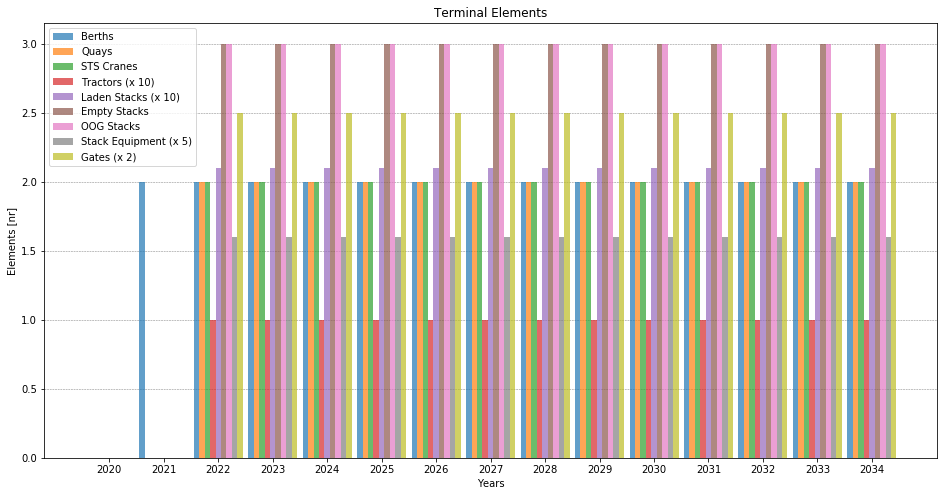

In [11]:
Terminal.terminal_elements_plot()

   > Total time at berth (planned) is 5159.0 h / 8640 oh
   > Total time at berth (planned) is 5159.0 h / 8640 oh
   > Total time at berth (planned) is 5159.0 h / 8640 oh
   > Total time at berth (online) is 5159.0 h / 8640 oh
   > Total time at berth (planned) is 5159.0 h / 8640 oh
   > Total time at berth (online) is 5159.0 h / 8640 oh
   > Total time at berth (planned) is 5159.0 h / 8640 oh
   > Total time at berth (online) is 5159.0 h / 8640 oh
   > Total time at berth (planned) is 5159.0 h / 8640 oh
   > Total time at berth (online) is 5159.0 h / 8640 oh
   > Total time at berth (planned) is 5159.0 h / 8640 oh
   > Total time at berth (online) is 5159.0 h / 8640 oh
   > Total time at berth (planned) is 5159.0 h / 8640 oh
   > Total time at berth (online) is 5159.0 h / 8640 oh
   > Total time at berth (planned) is 5159.0 h / 8640 oh
   > Total time at berth (online) is 5159.0 h / 8640 oh
   > Total time at berth (planned) is 5159.0 h / 8640 oh
   > Total time at berth (online) is 5

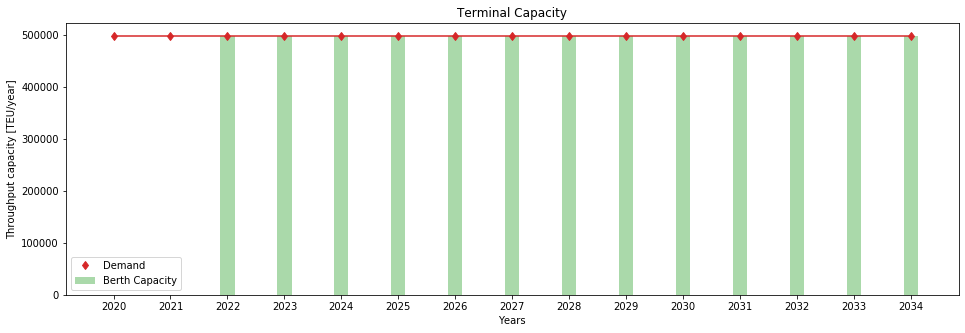

In [12]:
Terminal.terminal_capacity_plot()

    Year  Land use (ha)
0   2020       0.000000
1   2021       0.000000
2   2022      19.549325
3   2023      19.549325
4   2024      19.549325
5   2025      19.549325
6   2026      19.549325
7   2027      19.549325
8   2028      19.549325
9   2029      19.549325
10  2030      19.549325
11  2031      19.549325
12  2032      19.549325
13  2033      19.549325
14  2034      19.549325


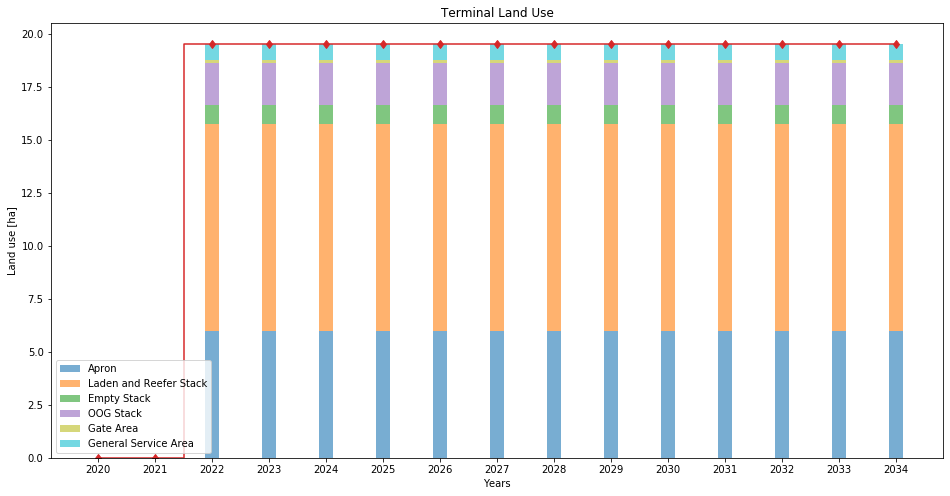

In [13]:
Terminal.land_use_plot()

#### Add cash flow information for each of the terminal elements.

In [14]:
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

    Year        Capex  Maintenance  Insurance        Energy        Labour  \
0   2020   51483860.4         0.00          0  0.000000e+00           NaN   
1   2021  136089508.6         0.00          0  0.000000e+00           NaN   
2   2022          0.0   5387297.47          0  1.509669e+06  9.880769e+06   
3   2023          0.0   5387297.47          0  1.509669e+06  9.880769e+06   
4   2024          0.0   5387297.47          0  1.509669e+06  9.880769e+06   
5   2025          0.0   5387297.47          0  1.509669e+06  9.880769e+06   
6   2026          0.0   5387297.47          0  1.509669e+06  9.880769e+06   
7   2027          0.0   5387297.47          0  1.509669e+06  9.880769e+06   
8   2028          0.0   5387297.47          0  1.509669e+06  9.880769e+06   
9   2029          0.0   5387297.47          0  1.509669e+06  9.880769e+06   
10  2030          0.0   5387297.47          0  1.509669e+06  9.880769e+06   
11  2031          0.0   5387297.47          0  1.509669e+06  9.880769e+06   

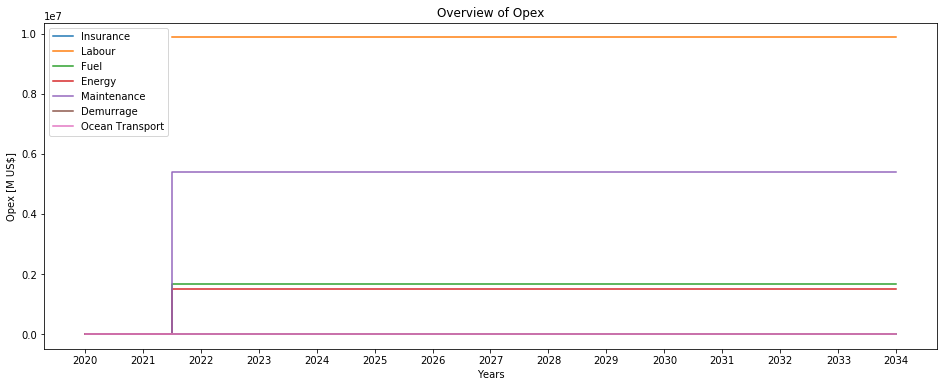

In [15]:
Terminal.opex_plot(cash_flows)

c:\checkouts\opentisim\opentisim\container_system.py:2528: FutureWarning: `item` has been deprecated and will be removed in a future version
  - cash_flows.loc[cash_flows['Year'] == year]['Ocean Transport'].item())


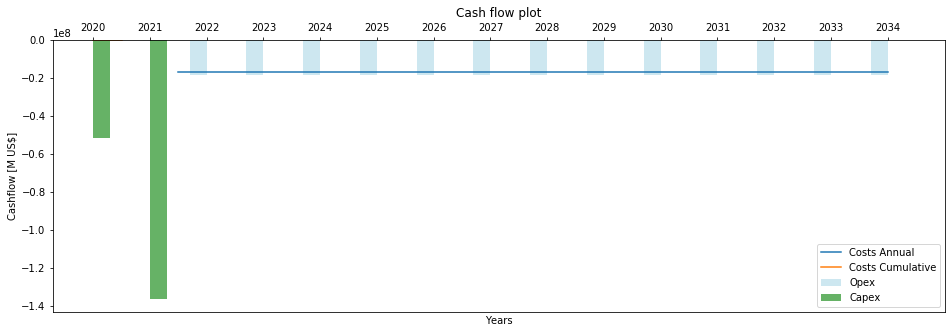

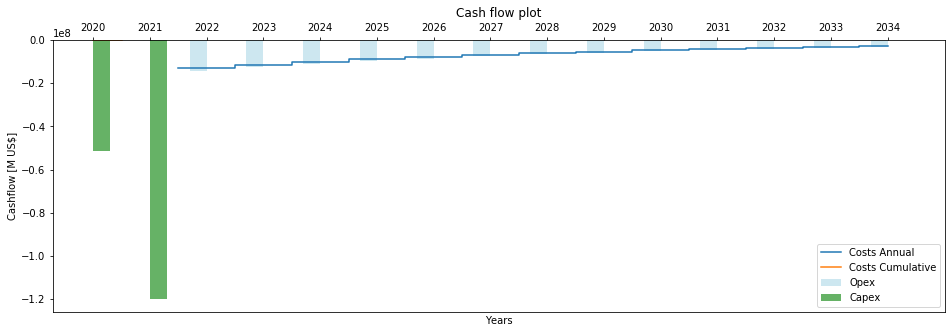

In [16]:
Terminal.cashflow_plot(cash_flows)
Terminal.cashflow_plot(cash_flows_WACC_real)

In [17]:
Terminal.NPV()

PV: [-5.14838604e+07 -1.19830196e+08 -1.42951735e+07 -1.25872557e+07
 -1.10833916e+07 -9.75920182e+06 -8.59321984e+06 -7.56654371e+06
 -6.66252986e+06 -5.86652318e+06 -5.16561951e+06 -4.54845641e+06
 -4.00502895e+06 -3.52652756e+06 -3.10519520e+06]
NPV: -268078722.92865065
